In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install flask-ngrok
!pip install config


In [ ]:
!chmod +x darknet

chmod: cannot access 'darknet': No such file or directory


In [ ]:
cd drive/MyDrive/SVHN_Yolo/darknet/

/content/drive/MyDrive/SVHN_Yolo/darknet


In [ ]:
#@title Func def
import cv2 as cv
import json
from google.colab.patches import cv2_imshow
def OneFuncToDoEverything(resultJson = './data/uploads/result.json', disp = 1,
                         conf_threshold = 0):
    '''
        This is a modified version of the same function in the yolo_setup.ipynb
        This will read the result json and display the images and write the
        result to a .txt to show on the demo website
        INPUT: 
            - resultJson: the result json file
            - disp: option to show or not show the image
            - conf_threshold: threshold to take or not take the detection
        OUTPUT:
            - FUNCTION output is none
    '''
    font = cv.FONT_HERSHEY_SIMPLEX
    #COL_NAMES = ['name','left','top','width','height', 'score','label']
    with open(resultJson) as json_file:
        data = json.load(json_file)
        print(data)
        
        # if return_df ==1:
        #     df = pd.DataFrame(columns=COL_NAMES)
     
        img_path = data[0]['filename']
        if disp ==1:
            print(img_path)
        objs = data[0]['objects']
        I = cv.imread(img_path)
        img_h = I.shape[0]
        img_w = I.shape[1]
        
        for j in range(len(objs)-1,-1,-1):
            num = objs[j]['name']
            cx = objs[j]['relative_coordinates']['center_x']
            cy = objs[j]['relative_coordinates']['center_y']
            w = objs[j]['relative_coordinates']['width']
            h = objs[j]['relative_coordinates']['height']

            conf = objs[j]['confidence']
            if conf < conf_threshold:
                continue
            
            x1= (int((cx-0.5*w)*img_w),int((cy-0.5*h)*img_h))
            x2= (int((cx+0.5*w)*img_w),int((cy+0.5*h)*img_h))
            x3= (int((cx)*img_w),int((cy+0.45*h)*img_h))
            if(disp==1):
                print(num, conf)


            cv.rectangle(I , x1 , x2, (0,255,0) ,2)
            cv.putText(I,num,x3, font, w*img_w*0.01,(255,255,0),1,cv.LINE_AA)
            cv.imwrite(data[0]['filename'].replace('.png','_predict.png'),I)
        with open('./data/uploads/std.txt','r') as f:
            towrite = f.readlines()[8:]
            print(towrite)
        with open('./data/uploads/result.txt','w') as f:
            for i in towrite:
                f.write(i)
        
        if disp ==1 :
            cv2_imshow(I)
            print('========================================================')
        return None

In [ ]:
OneFuncToDoEverything()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://af575f556b09.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Jan/2021 04:03:57] "GET / HTTP/1.1" 200 -


[DBG] Files:
 []
[DBG] Branch try
[DBG] Branch except


127.0.0.1 - - [18/Jan/2021 04:03:58] "GET /favicon.ico HTTP/1.1" 404 -


./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json ./data/uploads/1.png > ./data/uploads/std.txt
[{'frame_id': 1, 'filename': './data/uploads/1.png', 'objects': [{'class_id': 8, 'name': '8', 'relative_coordinates': {'center_x': 0.261603, 'center_y': 0.544421, 'width': 0.113817, 'height': 0.239117}, 'confidence': 0.3965}, {'class_id': 5, 'name': '5', 'relative_coordinates': {'center_x': 0.389815, 'center_y': 0.540191, 'width': 0.147819, 'height': 0.223564}, 'confidence': 0.392217}, {'class_id': 3, 'name': '3', 'relative_coordinates': {'center_x': 0.692649, 'center_y': 0.535753, 'width': 0.167845, 'height': 0.250232}, 'confidence': 0.49196}, {'class_id': 0, 'name': '0', 'relative_coordinates': {'center_x': 0.527553, 'center_y': 0.538678, 'width': 0.175443, 'height': 0.233095}, 'confidence': 0.646793}]}]
./data/uploads/1.png
0 0.646793
3 0.49196
5 0.392217
8 0.3965
['./data/uploads/1.png: Predicted in 3.460000

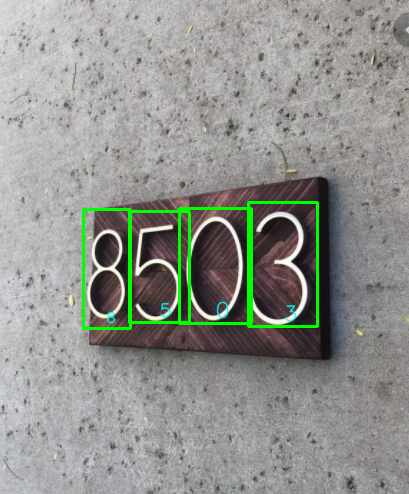

127.0.0.1 - - [18/Jan/2021 04:04:18] "POST / HTTP/1.1" 302 -


127.0.0.1 - - [18/Jan/2021 04:04:19] "GET / HTTP/1.1" 200 -


[DBG] Files:
 ['1.png', 'std.txt', 'result.json', '1_predict.png', 'result.txt']
[DBG] Branch try
[DBG] filename:  ['1_predict.png']
[DBG] type(filename):  <class 'list'>


127.0.0.1 - - [18/Jan/2021 04:04:19] "GET /uploads/1_predict.png HTTP/1.1" 200 -


./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json ./data/uploads/5.png > ./data/uploads/std.txt
[{'frame_id': 1, 'filename': './data/uploads/5.png', 'objects': [{'class_id': 3, 'name': '3', 'relative_coordinates': {'center_x': 0.538923, 'center_y': 0.476846, 'width': 0.111603, 'height': 0.215698}, 'confidence': 0.769724}, {'class_id': 1, 'name': '1', 'relative_coordinates': {'center_x': 0.418829, 'center_y': 0.473771, 'width': 0.090463, 'height': 0.21666}, 'confidence': 0.555679}]}]
./data/uploads/5.png
1 0.555679
3 0.769724
['./data/uploads/5.png: Predicted in 3.400000 milli-seconds.\n', '1: 56%\t(left_x:  123   top_y:   74   width:   30   height:   44)\n', '3: 77%\t(left_x:  158   top_y:   75   width:   37   height:   44)\n']


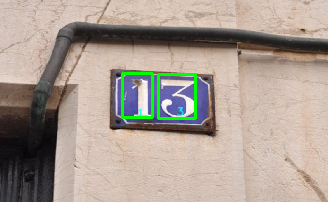

127.0.0.1 - - [18/Jan/2021 04:04:46] "POST / HTTP/1.1" 302 -


127.0.0.1 - - [18/Jan/2021 04:04:46] "GET / HTTP/1.1" 200 -


[DBG] Files:
 ['1.png', 'std.txt', 'result.json', '1_predict.png', 'result.txt', '5.png', '5_predict.png']
[DBG] Branch try
[DBG] filename:  ['5_predict.png']
[DBG] type(filename):  <class 'list'>


127.0.0.1 - - [18/Jan/2021 04:04:46] "GET /uploads/5_predict.png HTTP/1.1" 200 -


./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json ./data/uploads/3.png > ./data/uploads/std.txt
[{'frame_id': 1, 'filename': './data/uploads/3.png', 'objects': [{'class_id': 6, 'name': '6', 'relative_coordinates': {'center_x': 0.410957, 'center_y': 0.328575, 'width': 0.079246, 'height': 0.276536}, 'confidence': 0.673411}, {'class_id': 2, 'name': '2', 'relative_coordinates': {'center_x': 0.47219, 'center_y': 0.29919, 'width': 0.073456, 'height': 0.284861}, 'confidence': 0.34168}, {'class_id': 0, 'name': '0', 'relative_coordinates': {'center_x': 0.544322, 'center_y': 0.325905, 'width': 0.089685, 'height': 0.277805}, 'confidence': 0.432628}]}]
./data/uploads/3.png
0 0.432628
2 0.34168
6 0.673411
['./data/uploads/3.png: Predicted in 3.408000 milli-seconds.\n', '6: 67%\t(left_x:  117   top_y:   32   width:   25   height:   46)\n', '2: 34%\t(left_x:  137   top_y:   26   width:   23   height:   47)\n', '0: 43%\t(

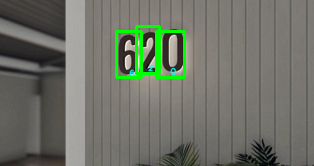

127.0.0.1 - - [18/Jan/2021 04:05:09] "POST / HTTP/1.1" 302 -


127.0.0.1 - - [18/Jan/2021 04:05:09] "GET / HTTP/1.1" 200 -


[DBG] Files:
 ['1.png', 'std.txt', 'result.json', '1_predict.png', 'result.txt', '5.png', '5_predict.png', '3.png', '3_predict.png']
[DBG] Branch try
[DBG] filename:  ['3_predict.png']
[DBG] type(filename):  <class 'list'>


127.0.0.1 - - [18/Jan/2021 04:05:10] "GET /uploads/3_predict.png HTTP/1.1" 200 -


./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json ./data/uploads/6.png > ./data/uploads/std.txt
[{'frame_id': 1, 'filename': './data/uploads/6.png', 'objects': [{'class_id': 8, 'name': '8', 'relative_coordinates': {'center_x': 0.76594, 'center_y': 0.423071, 'width': 0.209532, 'height': 0.426808}, 'confidence': 0.750577}, {'class_id': 4, 'name': '4', 'relative_coordinates': {'center_x': 0.347685, 'center_y': 0.426322, 'width': 0.207365, 'height': 0.415067}, 'confidence': 0.624657}, {'class_id': 1, 'name': '1', 'relative_coordinates': {'center_x': 0.513552, 'center_y': 0.456202, 'width': 0.120991, 'height': 0.390374}, 'confidence': 0.371107}, {'class_id': 1, 'name': '1', 'relative_coordinates': {'center_x': 0.204666, 'center_y': 0.456432, 'width': 0.123296, 'height': 0.393807}, 'confidence': 0.349951}]}]
./data/uploads/6.png
1 0.349951
1 0.371107
4 0.624657
8 0.750577
['./data/uploads/6.png: Predicted in 3.4

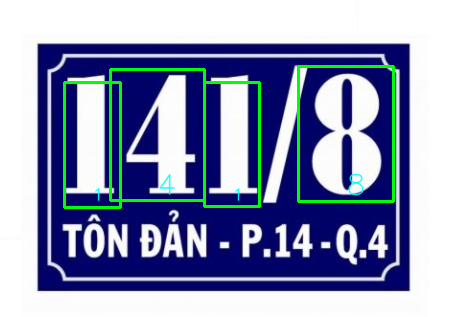

127.0.0.1 - - [18/Jan/2021 04:07:01] "POST / HTTP/1.1" 302 -


127.0.0.1 - - [18/Jan/2021 04:07:02] "GET / HTTP/1.1" 200 -


[DBG] Files:
 ['1.png', 'std.txt', 'result.json', '1_predict.png', 'result.txt', '5.png', '5_predict.png', '3.png', '3_predict.png', '6.png', '6_predict.png']
[DBG] Branch try
[DBG] filename:  ['6_predict.png']
[DBG] type(filename):  <class 'list'>


127.0.0.1 - - [18/Jan/2021 04:07:02] "GET /uploads/6_predict.png HTTP/1.1" 200 -


./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json ./data/uploads/7.png > ./data/uploads/std.txt
[{'frame_id': 1, 'filename': './data/uploads/7.png', 'objects': [{'class_id': 9, 'name': '9', 'relative_coordinates': {'center_x': 0.741144, 'center_y': 0.355454, 'width': 0.241923, 'height': 0.461768}, 'confidence': 0.578741}, {'class_id': 2, 'name': '2', 'relative_coordinates': {'center_x': 0.290745, 'center_y': 0.35765, 'width': 0.270537, 'height': 0.455991}, 'confidence': 0.779517}, {'class_id': 1, 'name': '1', 'relative_coordinates': {'center_x': 0.5299, 'center_y': 0.354044, 'width': 0.198115, 'height': 0.478789}, 'confidence': 0.823816}]}]
./data/uploads/7.png
1 0.823816
2 0.779517
9 0.578741
['./data/uploads/7.png: Predicted in 3.465000 milli-seconds.\n', '2: 78%\t(left_x:   83   top_y:   49   width:  144   height:  173)\n', '1: 82%\t(left_x:  230   top_y:   44   width:  106   height:  182)\n', '9: 58%\t

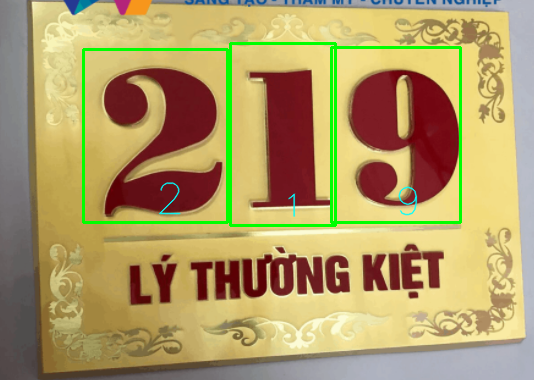

127.0.0.1 - - [18/Jan/2021 04:09:00] "POST / HTTP/1.1" 302 -


127.0.0.1 - - [18/Jan/2021 04:09:01] "GET / HTTP/1.1" 200 -


[DBG] Files:
 ['1.png', 'std.txt', 'result.json', '1_predict.png', 'result.txt', '5.png', '5_predict.png', '3.png', '3_predict.png', '6.png', '6_predict.png', '7.png', '7_predict.png']
[DBG] Branch try
[DBG] filename:  ['7_predict.png']
[DBG] type(filename):  <class 'list'>


127.0.0.1 - - [18/Jan/2021 04:09:01] "GET /uploads/7_predict.png HTTP/1.1" 200 -


In [ ]:
import numpy as np
import os
import glob
import cv2
import config as cfg
import pickle
import json

from flask import Flask, render_template, request, redirect
from flask import send_from_directory, url_for
from werkzeug.utils import secure_filename
from flask import request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
app.config['MAX_CONTENT_LENGTH'] = 1024 * 1024
app.config['UPLOAD_EXTENSIONS'] = ['.jpg', '.png']
app.config['UPLOAD_PATH'] = './data/uploads'
app.config['COMMAND'] = './darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out ./data/uploads/result.json '
run_with_ngrok(app)  # Start ngrok when app is run


        #input()


# for / root, return Hello Word
@app.route('/hello/')
def hello():
    return 'Hello world'


@app.route('/')
def index():
    '''
        This function reads the content files and render the website
    '''
    files = os.listdir(app.config['UPLOAD_PATH'])
    print('[DBG] Files:\n', files)
    try:
        print('[DBG] Branch try')
        filename = max(glob.glob(app.config['UPLOAD_PATH'] + '/*.png'), key=os.path.getctime)
        filename = [filename.split('/')[-1]]
        print('[DBG] filename: ', filename)
        print('[DBG] type(filename): ', type(filename))
        # Read the result .txt created from the detection
        with open(os.path.join(app.config['UPLOAD_PATH'],'result.txt')) as f:
            content = f.read()
        return render_template('index.html',files=filename, content=content)
    except:
        #if nothing then render with no image or output
        print('[DBG] Branch except')
        return render_template('index.html')


@app.route('/uploads/<filename>')

def upload(filename):
    '''
        Show the image in upload folder
    '''
	return send_from_directory(app.config['UPLOAD_PATH'], filename)

@app.route('/', methods = ['POST'])
def upload_file():
    '''
        This function allows uploading images, run the model, and display the
        output on the web server
    '''
    uploaded_file = request.files['file']
    filename = secure_filename(uploaded_file.filename)
    if filename != '':
        file_ext = os.path.splitext(filename)[1]
        if file_ext not in app.config['UPLOAD_EXTENSIONS']:
            abort(400)
# filename = 'image' + file_ext
        uploaded_file.save(os.path.join(app.config['UPLOAD_PATH'],filename))

        cc = app.config['COMMAND']+os.path.join(app.config['UPLOAD_PATH'], filename + ' > ./data/uploads/std.txt')
        print(cc)
        #os.system(cc+ ' > ./data/uploads/std.txt')
        os.system(cc)
        OneFuncToDoEverything()

    return redirect(url_for('index'))

if __name__ == '__main__':
    app.run()

In [ ]:
os.system('./darknet detector test data/obj.data cfg/svhn.cfg backup/svhn_best.weights -ext_output -dont_show -out result.json ./data/uploads/27.png > ./data/uploads/std.txt')

0

In [ ]:
OneFuncToDoEverything()

TypeError: ignored

In [ ]:
filename = max(glob.glob(app.config['UPLOAD_PATH'] + '/*.png'), key=os.path.getctime)
filename = filename.split('/')
print(filename[-1])

40_predict.png
